In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('C:/Users/Bangda/Desktop/pandas')
flights = pd.read_csv('flights.csv', header = 0, index_col = 0)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336776 entries, 1 to 336776
Data columns (total 19 columns):
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(9), object(5)
memory usage: 51.4+ MB


The analysis motivation is from:
    
  http://soutik.github.io/NYC-Flight-Analysis/  
  https://ask.hellobi.com/blog/louwill12/8648

In [4]:
# Dimension
flights.shape, flights.size, len(flights)

((336776, 19), 6398744, 336776)

In [5]:
# Filter the observations at Jan 1st
first_day_flights = flights.loc[(flights['month'] == 1) & (flights['day'] == 1)]
print(first_day_flights.shape)
first_day_flights.head()

(842, 19)


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [6]:
# Arrange the observations by arr_delay (descending)
arr_delay_desc = flights.sort(columns = 'arr_delay', ascending = False)
arr_delay_desc.head()

C:\Users\Bangda\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7073,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 09:00:00
235779,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 19:00:00
8240,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 16:00:00
327044,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20 18:00:00
270377,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22 16:00:00


In [7]:
# Add two new columns: gain - differences of arr_delay and dep_delay, speed
flights['gain'] = flights['arr_delay'] - flights['dep_delay']
flights['speed'] = flights['distance'] / flights['air_time'].astype(np.float)
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,gain,speed
1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,9.0,6.167401
2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,16.0,6.237885
3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,31.0,6.806250
4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,-17.0,8.612022
5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,-19.0,6.568966


In [8]:
# Summarise: calculate the mean of dep_delay and arr_delay
flights[['dep_delay', 'arr_delay']].apply(np.mean)

dep_delay    12.639070
arr_delay     6.895377
dtype: float64

In [9]:
# Number of obversations of each destination
flights.groupby('dest').apply(len)

dest
ABQ      254
ACK      265
ALB      439
ANC        8
ATL    17215
AUS     2439
AVL      275
BDL      443
BGR      375
BHM      297
BNA     6333
BOS    15508
BQN      896
BTV     2589
BUF     4681
BUR      371
BWI     1781
BZN       36
CAE      116
CAK      864
CHO       52
CHS     2884
CLE     4573
CLT    14064
CMH     3524
CRW      138
CVG     3941
DAY     1525
DCA     9705
DEN     7266
       ...  
PIT     2875
PSE      365
PSP       19
PVD      376
PWM     2352
RDU     8163
RIC     2454
ROC     2416
RSW     3537
SAN     2737
SAT      686
SAV      804
SBN       10
SDF     1157
SEA     3923
SFO    13331
SJC      329
SJU     5819
SLC     2467
SMF      284
SNA      825
SRQ     1211
STL     4339
STT      522
SYR     1761
TPA     7466
TUL      315
TVC      101
TYS      631
XNA     1036
dtype: int64

In [10]:
# Find the top 5 dep_delay planes on Jan 28th in JFK
flights[(flights['month'] == 1) & (flights['day'] == 28) & (flights['origin'] == 'JFK')].sort('dep_delay', ascending = False)\
[['tailnum']].head()

C:\Users\Bangda\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,tailnum
24146,N8525B
24217,N8907A
24106,N902XJ
24209,N601LR
23795,N510MQ


In [11]:
# Count the number of observations and calculate average distance of each plane
plane_info = flights.groupby('tailnum')[['distance', 'arr_delay']].mean()
plane_info['num'] = flights.groupby('tailnum')[['tailnum']].count()
plane_info[(plane_info['num'] > 20) & (plane_info['distance'] < 2000)].head()

,distance,arr_delay,num
tailnum,,,
N0EGMQ,676.188679,9.982955,371
N10156,757.947712,12.717241,153
N102UW,535.875000,2.937500,48
N103US,535.195652,-6.934783,46
N104UW,535.255319,1.804348,47


In [12]:
# What was the worst day to fly out of NYC if you dislike deplayed flights (average delay to be max of that day)
flights['total_delay'] = flights['arr_delay'] + flights['dep_delay']
flights.groupby(['month', 'day'])[['total_delay']].mean().sort('total_delay', ascending = False).head()

C:\Users\Bangda\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


total_delay
month day             
3     8     169.510025
7     1     114.503991
5     23    112.605820
7     10    110.821513
      22    109.430070

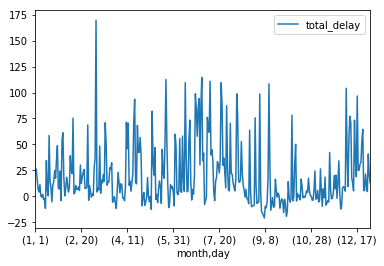

In [13]:
flights.groupby(['month', 'day'])[['total_delay']].mean().plot(kind = 'line')

In [14]:
# Find the above 'day' for all airport    
avg_total_delay = flights.groupby([ 'origin', 'month', 'day'])[['total_delay']].mean().sort('total_delay', ascending = False).head(6)
avg_total_delay

C:\Users\Bangda\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


total_delay
origin month day             
EWR    3     8     202.751880
LGA    3     8     202.640351
       9     2     152.101626
       12    5     143.787500
       5     23    137.094421
JFK    7     10    132.253425